In [4]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)


/projects/anaconda38/envs/py36new/bin/python3.6
3.6.11 | packaged by conda-forge | (default, Aug  5 2020, 20:09:42) 
[GCC 7.5.0]
sys.version_info(major=3, minor=6, micro=11, releaselevel='final', serial=0)


In [5]:
#!pip install astropy
import matplotlib.pyplot as plt
import sys, os
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   'text.usetex': False,
   }
plt.rcParams.update(params)
#import agama


In [6]:
def DehnenBarPotential(amp, rb, pitchAngle, scaleRadius, scaleHeight):
    def potfnc(xyz):
        R = (xyz[:,0]**2. + xyz[:,1]**2 + xyz[:,2])**0.5
        phi = numpy.arctan2(xyz[:,1], xyz[:,0])
        barpot = numpy.zeros(len(R))
        m = (R>=rb)
        print(R)
        barpot[m] = -(rb/R)**3.
        barpot[~m] = -(R/rb)**3-2
        Phi = amp*barpot
        return numpy.nan_to_num(Phi)  # VERY IMPORTANT is to make sure it never produces a NaN

    # now create a CylSpline potential approximating this user-defined profile,
    # paying special attention to the grid parameters
    print('generate bar')
    return agama.Potential(type='CylSpline', potential=potfnc,
    Rmin = 0.01 * scaleRadius,  # (these could be adjusted if needed)
    Rmax = 10.0 * scaleRadius,
    zmin = 0.25 * scaleHeight,
    zmax = 10.0 * scaleHeight,
    mmax = 3 * 2,    # each arm is represented by three harmonic terms: m, m*2, m*3
    gridSizeZ = 20,
    # rule of thumb for the radial grid spacing is to resolve
    # the change in the pitch angle of the spiral with one grid cell
    gridSizeR = max(25, numpy.log(10.0 / 0.01) / numpy.tan(pitchAngle)))



In [7]:
import agama, numpy, galpy, matplotlib.pyplot as plt

agama.setUnits(length=1, velocity=1, mass=1)

omegab = -39 # bar pattern speed
bar_angle = -25.0 * numpy.pi/180  # orientation of the bar w.r.t. the Sun

# P = agama.Potential(type='Logarithmic', v0=200)
diskP = agama.Potential(type='Logarithmic', v0=200)
barP = agama.Potential(type='Ferrers', scaleRadius=5, axisRatioY = 0.5, axisRatioZ = 0.1, mass = 1e10)

P = agama.Potential(diskP, barP)


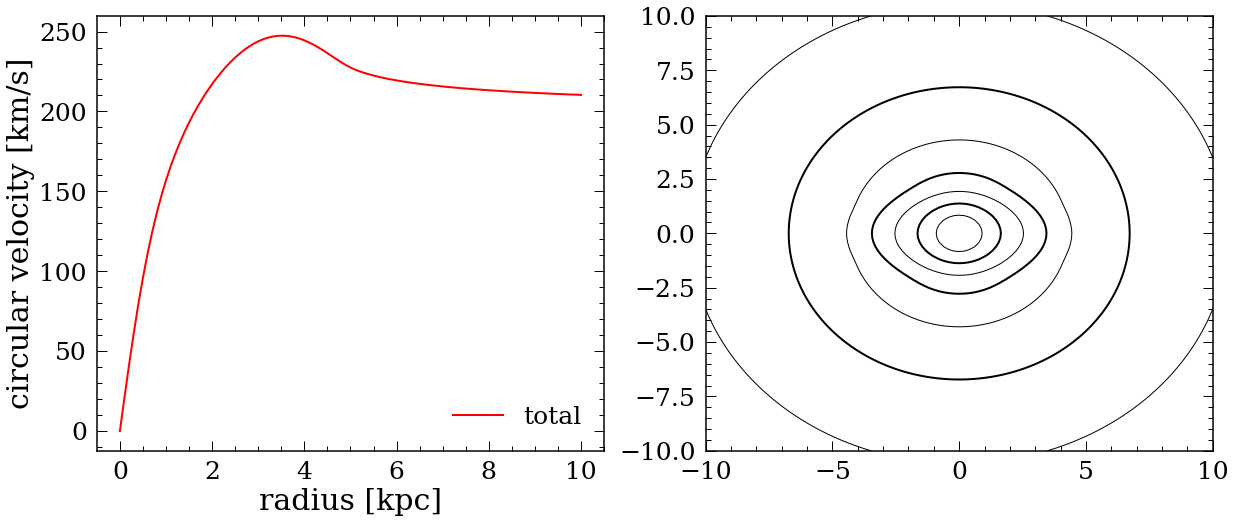

"for i,o in enumerate(orbits[::int(numorbits/10)]):\n    ax[1].plot(o[:,0]*cosa-o[:,1]*sina, o[:,0]*sina+o[:,1]*cosa, color=cmap(i*1.0/(10)), lw=0.5)\nax[1].plot(-8.2,0.0, 'ko', ms=5)  # Solar position\nax[1].text(-8.0,0.0, 'Sun')\nax[1].set_xlabel('x [kpc]')\nax[1].set_ylabel('y [kpc]')\nax[1].set_xlim(-rmax, rmax)\nax[1].set_ylim(-rmax, rmax)\n\n# overplot the surface density contours\nprint('Computing surface density')\ngridr  = numpy.linspace(-rmax, rmax, 101)  # 1d grid\ngridxy = numpy.column_stack((numpy.repeat(gridr, len(gridr)), numpy.tile(gridr, len(gridr))))  # 2d grid\nSigma  = pot[0].projectedDensity(gridxy, gamma=-bar_angle)  # surface density for a stellar component rotated by bar_angle\nlogSigma = 2.5 * numpy.log10(Sigma / numpy.max(Sigma))      # log-scaled to magnitudes per unit square\n# thick lines spaced by one magnitude, thin lines lie halfway between thick ones\nax[1].contour(gridr, gridr, logSigma.reshape(len(gridr), len(gridr)).T,\n    levels=numpy.linspace(-8,0

In [8]:

rmax = 10.0   # plotting range
cmap = plt.get_cmap('mist')

r=numpy.linspace(0,rmax,101)
xyz=numpy.column_stack((r,r*0,r*0))

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(r, (-r*P.force(xyz)[:,0])**0.5, 'r', label='total')
plt.legend(loc='lower right', frameon=False)
plt.xlabel('radius [kpc]')
plt.ylabel('circular velocity [km/s]')

plt.subplot(1,2,2)
gridr  = numpy.linspace(-rmax, rmax, 101)  # 1d grid
gridxy = numpy.column_stack((numpy.repeat(gridr, len(gridr)), numpy.tile(gridr, len(gridr))))  # 2d grid
Sigma  = P.projectedDensity(gridxy)  # surface density for a stellar component rotated by bar_angle
logSigma = 2.5 * numpy.log10(Sigma / numpy.max(Sigma))      # log-scaled to magnitudes per unit square
# thick lines spaced by one magnitude, thin lines lie halfway between thick ones
plt.contour(gridr, gridr, logSigma.reshape(len(gridr), len(gridr)).T,
    levels=numpy.linspace(-8,0,17), colors='k', zorder=5, linewidths=[2,1], linestyles='solid')
plt.show()

"""for i,o in enumerate(orbits[::int(numorbits/10)]):
    ax[1].plot(o[:,0]*cosa-o[:,1]*sina, o[:,0]*sina+o[:,1]*cosa, color=cmap(i*1.0/(10)), lw=0.5)
ax[1].plot(-8.2,0.0, 'ko', ms=5)  # Solar position
ax[1].text(-8.0,0.0, 'Sun')
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('y [kpc]')
ax[1].set_xlim(-rmax, rmax)
ax[1].set_ylim(-rmax, rmax)

# overplot the surface density contours
print('Computing surface density')
gridr  = numpy.linspace(-rmax, rmax, 101)  # 1d grid
gridxy = numpy.column_stack((numpy.repeat(gridr, len(gridr)), numpy.tile(gridr, len(gridr))))  # 2d grid
Sigma  = pot[0].projectedDensity(gridxy, gamma=-bar_angle)  # surface density for a stellar component rotated by bar_angle
logSigma = 2.5 * numpy.log10(Sigma / numpy.max(Sigma))      # log-scaled to magnitudes per unit square
# thick lines spaced by one magnitude, thin lines lie halfway between thick ones
ax[1].contour(gridr, gridr, logSigma.reshape(len(gridr), len(gridr)).T,
    levels=numpy.linspace(-8,0,17), colors='k', zorder=5, linewidths=[2,1], linestyles='solid')

plt.tight_layout()
plt.show()"""

In [74]:
# integrate and show a few orbits
numorbits=int(1e7)
numpy.random.seed(5)
ic=numpy.random.normal(size=(numorbits,6)) * numpy.array([2, 0.0, 0.4, 50., 40., 30.])
ic[:,0] += -8.2
ic[:,4] += 220
plt.hist(ic[:,0],color='k', bins=10)
plt.vlines(-8.2, ymin=0, ymax=numorbits/5, color='r')
plt.show()


In [3]:
from tqdm import trange

In [77]:
splitsec = 100
for i in trange(splitsec):
    orbits = agama.orbit(potential=P, ic=ic[int(i*1e5):int(i*1e5+1e5)], time=10., trajsize=1, Omega=-39.0)[:,1]
    numpy.save('orbits_'+str(i), orbits)



  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [02:41<4:25:56, 161.17s/it]

  2%|▏         | 2/100 [05:22<4:23:02, 161.05s/it]

  3%|▎         | 3/100 [08:03<4:20:40, 161.24s/it]

  4%|▍         | 4/100 [10:44<4:17:49, 161.14s/it]

  5%|▌         | 5/100 [13:26<4:15:17, 161.24s/it]

  6%|▌         | 6/100 [16:08<4:13:01, 161.50s/it]

  7%|▋         | 7/100 [18:49<4:10:22, 161.53s/it]

  8%|▊         | 8/100 [21:30<4:07:29, 161.41s/it]

  9%|▉         | 9/100 [24:11<4:04:41, 161.33s/it]

 10%|█         | 10/100 [26:52<4:01:50, 161.23s/it]

 11%|█         | 11/100 [29:34<3:59:07, 161.21s/it]

 12%|█▏        | 12/100 [32:15<3:56:30, 161.25s/it]

 13%|█▎        | 13/100 [34:57<3:53:59, 161.37s/it]

 14%|█▍        | 14/100 [37:38<3:51:14, 161.33s/it]

 15%|█▌        | 15/100 [40:19<3:48:35, 161.36s/it]

 16%|█▌        | 16/100 [43:01<3:45:56, 161.38s/it]

 17%|█▋        | 17/100 [45:43<3:43:32, 161.60s/it]

 18%|█▊        | 18/100 [48:24<3:40:46, 161.54s/it]

 19%|█▉        | 19/100 [51:05<3:37:49, 161.35s/it]

 20%|██        | 20/100 [53:46<3:34:55, 161.20s/it]

 21%|██        | 21/100 [56:27<3:32:04, 161.07s/it]

 22%|██▏       | 22/100 [59:08<3:29:20, 161.03s/it]

 23%|██▎       | 23/100 [1:01:49<3:26:41, 161.06s/it]

 24%|██▍       | 24/100 [1:04:30<3:24:04, 161.11s/it]

 25%|██▌       | 25/100 [1:07:11<3:21:19, 161.06s/it]

 26%|██▌       | 26/100 [1:09:52<3:18:47, 161.18s/it]

 27%|██▋       | 27/100 [1:12:34<3:16:06, 161.19s/it]

 28%|██▊       | 28/100 [1:15:15<3:13:28, 161.23s/it]

 29%|██▉       | 29/100 [1:17:55<3:10:27, 160.95s/it]

 30%|███       | 30/100 [1:20:37<3:08:05, 161.21s/it]

 31%|███       | 31/100 [1:23:18<3:05:16, 161.11s/it]

 32%|███▏      | 32/100 [1:25:59<3:02:31, 161.05s/it]

 33%|███▎      | 33/100 [1:28:40<2:59:58, 161.17s/it]

 34%|███▍      | 34/100 [1:31:21<2:57:09, 161.06s/it]

 35%|███▌      | 35/100 [1:34:02<2:54:23, 160.97s/it]

 36%|███▌      | 36/100 [1:36:43<2:51:48, 161.06s/it]

 37%|███▋      | 37/100 [1:39:25<2:49:21, 161.29s/it]

 38%|███▊      | 38/100 [1:42:07<2:46:57, 161.57s/it]

 39%|███▉      | 39/100 [1:44:48<2:44:09, 161.47s/it]

 40%|████      | 40/100 [1:47:29<2:41:20, 161.34s/it]

 41%|████      | 41/100 [1:50:11<2:38:38, 161.32s/it]

 42%|████▏     | 42/100 [1:52:52<2:35:48, 161.18s/it]

 43%|████▎     | 43/100 [1:55:33<2:33:08, 161.21s/it]

 44%|████▍     | 44/100 [1:58:14<2:30:32, 161.29s/it]

 45%|████▌     | 45/100 [2:00:56<2:27:53, 161.33s/it]

 46%|████▌     | 46/100 [2:03:38<2:25:22, 161.52s/it]

 47%|████▋     | 47/100 [2:06:19<2:22:37, 161.47s/it]

 48%|████▊     | 48/100 [2:09:01<2:20:05, 161.64s/it]

 49%|████▉     | 49/100 [2:11:43<2:17:21, 161.59s/it]

 50%|█████     | 50/100 [2:14:24<2:14:37, 161.55s/it]

 51%|█████     | 51/100 [2:17:06<2:11:59, 161.62s/it]

 52%|█████▏    | 52/100 [2:19:48<2:09:20, 161.67s/it]

 53%|█████▎    | 53/100 [2:22:29<2:06:32, 161.54s/it]

 54%|█████▍    | 54/100 [2:25:10<2:03:48, 161.48s/it]

 55%|█████▌    | 55/100 [2:27:52<2:01:07, 161.51s/it]

 56%|█████▌    | 56/100 [2:30:34<1:58:31, 161.62s/it]

 57%|█████▋    | 57/100 [2:33:15<1:55:47, 161.57s/it]

 58%|█████▊    | 58/100 [2:35:57<1:53:12, 161.74s/it]

 59%|█████▉    | 59/100 [2:38:39<1:50:26, 161.61s/it]

 60%|██████    | 60/100 [2:41:20<1:47:37, 161.43s/it]

 61%|██████    | 61/100 [2:44:00<1:44:47, 161.23s/it]

 62%|██████▏   | 62/100 [2:46:41<1:42:00, 161.07s/it]

 63%|██████▎   | 63/100 [2:49:21<1:39:12, 160.88s/it]

 64%|██████▍   | 64/100 [2:52:02<1:36:31, 160.88s/it]

 65%|██████▌   | 65/100 [2:54:44<1:33:59, 161.13s/it]

 66%|██████▌   | 66/100 [2:57:25<1:31:17, 161.12s/it]

 67%|██████▋   | 67/100 [3:00:06<1:28:35, 161.07s/it]

 68%|██████▊   | 68/100 [3:02:47<1:25:49, 160.91s/it]

 69%|██████▉   | 69/100 [3:05:28<1:23:08, 160.91s/it]

 70%|███████   | 70/100 [3:08:08<1:20:26, 160.88s/it]

 71%|███████   | 71/100 [3:10:49<1:17:41, 160.74s/it]

 72%|███████▏  | 72/100 [3:13:30<1:15:05, 160.89s/it]

 73%|███████▎  | 73/100 [3:16:11<1:12:23, 160.89s/it]

 74%|███████▍  | 74/100 [3:18:52<1:09:42, 160.85s/it]

 75%|███████▌  | 75/100 [3:21:33<1:07:01, 160.87s/it]

 76%|███████▌  | 76/100 [3:24:13<1:04:20, 160.85s/it]

 77%|███████▋  | 77/100 [3:26:55<1:01:43, 161.01s/it]

 78%|███████▊  | 78/100 [3:29:36<59:04, 161.09s/it]  

 79%|███████▉  | 79/100 [3:32:17<56:21, 161.04s/it]

 80%|████████  | 80/100 [3:34:58<53:39, 160.98s/it]

 81%|████████  | 81/100 [3:37:39<51:00, 161.10s/it]

 82%|████████▏ | 82/100 [3:40:20<48:20, 161.16s/it]

 83%|████████▎ | 83/100 [3:43:01<45:35, 160.94s/it]

 84%|████████▍ | 84/100 [3:45:42<42:57, 161.12s/it]

 85%|████████▌ | 85/100 [3:48:23<40:16, 161.07s/it]

 86%|████████▌ | 86/100 [3:51:04<37:34, 161.06s/it]

 87%|████████▋ | 87/100 [3:53:46<34:54, 161.14s/it]

 88%|████████▊ | 88/100 [3:56:27<32:14, 161.24s/it]

 89%|████████▉ | 89/100 [3:59:08<29:33, 161.24s/it]

 90%|█████████ | 90/100 [4:01:50<26:52, 161.20s/it]

 91%|█████████ | 91/100 [4:04:30<24:09, 161.08s/it]

 92%|█████████▏| 92/100 [4:07:11<21:28, 161.03s/it]

 93%|█████████▎| 93/100 [4:09:53<18:47, 161.11s/it]

 94%|█████████▍| 94/100 [4:12:34<16:06, 161.11s/it]

 95%|█████████▌| 95/100 [4:15:15<13:25, 161.16s/it]

 96%|█████████▌| 96/100 [4:17:56<10:44, 161.03s/it]

 97%|█████████▋| 97/100 [4:20:37<08:02, 160.96s/it]

 98%|█████████▊| 98/100 [4:23:18<05:22, 161.07s/it]

 99%|█████████▉| 99/100 [4:25:59<02:41, 161.21s/it]

100%|██████████| 100/100 [4:28:40<00:00, 161.17s/it]

100%|██████████| 100/100 [4:28:40<00:00, 161.21s/it]

### Get the orbits

In [1]:
def getlastpos(orbits):
    o = np.zeros((len(orbits),6))
    for i in range(len(orbits)):
        o[i,:] = orbits[i][-1,:]
    return o

In [9]:
import numpy as np
orbits = np.load('orbits_0.npy',allow_pickle=True)
lastorbit = getlastpos(orbits)

for i in trange(1,100):
    orbits = np.load('orbits_'+str(i)+'.npy',allow_pickle=True)
    lastorbit_sing = getlastpos(orbits)
    lastorbit = np.vstack([lastorbit, lastorbit_sing])
np.save('lastorbit', lastorbit)


  0%|          | 0/99 [00:00<?, ?it/s]

  1%|          | 1/99 [00:00<00:23,  4.14it/s]

  2%|▏         | 2/99 [00:00<00:23,  4.16it/s]

  3%|▎         | 3/99 [00:00<00:23,  4.10it/s]

  4%|▍         | 4/99 [00:00<00:23,  4.08it/s]

  5%|▌         | 5/99 [00:01<00:23,  4.03it/s]

  6%|▌         | 6/99 [00:01<00:23,  4.03it/s]

  7%|▋         | 7/99 [00:01<00:22,  4.01it/s]

  8%|▊         | 8/99 [00:01<00:22,  3.97it/s]

  9%|▉         | 9/99 [00:02<00:22,  3.93it/s]

 10%|█         | 10/99 [00:02<00:22,  3.89it/s]

 11%|█         | 11/99 [00:02<00:22,  3.84it/s]

 12%|█▏        | 12/99 [00:03<00:23,  3.78it/s]

 13%|█▎        | 13/99 [00:03<00:23,  3.73it/s]

 14%|█▍        | 14/99 [00:03<00:23,  3.68it/s]

 15%|█▌        | 15/99 [00:03<00:23,  3.62it/s]

 16%|█▌        | 16/99 [00:04<00:23,  3.58it/s]

 17%|█▋        | 17/99 [00:04<00:23,  3.55it/s]

 18%|█▊        | 18/99 [00:04<00:23,  3.51it/s]

 19%|█▉        | 19/99 [00:05<00:23,  3.44it/s]

 20%|██        | 20/99 [00:05<00:23,  3.42it/s]

 21%|██        | 21/99 [00:05<00:23,  3.38it/s]

 22%|██▏       | 22/99 [00:05<00:23,  3.34it/s]

 23%|██▎       | 23/99 [00:06<00:23,  3.29it/s]

 24%|██▍       | 24/99 [00:06<00:23,  3.23it/s]

 25%|██▌       | 25/99 [00:06<00:23,  3.18it/s]

 26%|██▋       | 26/99 [00:07<00:23,  3.14it/s]

 27%|██▋       | 27/99 [00:07<00:23,  3.10it/s]

 28%|██▊       | 28/99 [00:07<00:23,  3.07it/s]

 29%|██▉       | 29/99 [00:08<00:22,  3.04it/s]

 30%|███       | 30/99 [00:08<00:22,  3.02it/s]

 31%|███▏      | 31/99 [00:08<00:22,  2.98it/s]

 32%|███▏      | 32/99 [00:09<00:22,  2.96it/s]

 33%|███▎      | 33/99 [00:09<00:22,  2.92it/s]

 34%|███▍      | 34/99 [00:10<00:22,  2.87it/s]

 35%|███▌      | 35/99 [00:10<00:22,  2.84it/s]

 36%|███▋      | 36/99 [00:10<00:22,  2.82it/s]

 37%|███▋      | 37/99 [00:11<00:22,  2.80it/s]

 38%|███▊      | 38/99 [00:11<00:21,  2.77it/s]

 39%|███▉      | 39/99 [00:11<00:22,  2.73it/s]

 40%|████      | 40/99 [00:12<00:22,  2.67it/s]

 41%|████▏     | 41/99 [00:12<00:21,  2.65it/s]

 42%|████▏     | 42/99 [00:13<00:21,  2.62it/s]

 43%|████▎     | 43/99 [00:13<00:21,  2.59it/s]

 44%|████▍     | 44/99 [00:13<00:21,  2.56it/s]

 45%|████▌     | 45/99 [00:14<00:21,  2.53it/s]

 46%|████▋     | 46/99 [00:14<00:21,  2.50it/s]

 47%|████▋     | 47/99 [00:15<00:20,  2.50it/s]

 48%|████▊     | 48/99 [00:15<00:20,  2.49it/s]

 49%|████▉     | 49/99 [00:15<00:20,  2.46it/s]

 51%|█████     | 50/99 [00:16<00:20,  2.45it/s]

 52%|█████▏    | 51/99 [00:16<00:19,  2.43it/s]

 53%|█████▎    | 52/99 [00:17<00:19,  2.40it/s]

 54%|█████▎    | 53/99 [00:17<00:19,  2.39it/s]

 55%|█████▍    | 54/99 [00:17<00:19,  2.37it/s]

 56%|█████▌    | 55/99 [00:18<00:18,  2.34it/s]

 57%|█████▋    | 56/99 [00:18<00:18,  2.32it/s]

 58%|█████▊    | 57/99 [00:19<00:18,  2.31it/s]

 59%|█████▊    | 58/99 [00:19<00:18,  2.26it/s]

 60%|█████▉    | 59/99 [00:20<00:17,  2.25it/s]

 61%|██████    | 60/99 [00:20<00:17,  2.23it/s]

 62%|██████▏   | 61/99 [00:21<00:17,  2.20it/s]

 63%|██████▎   | 62/99 [00:21<00:16,  2.18it/s]

 64%|██████▎   | 63/99 [00:22<00:16,  2.17it/s]

 65%|██████▍   | 64/99 [00:22<00:16,  2.14it/s]

 66%|██████▌   | 65/99 [00:23<00:16,  2.12it/s]

 67%|██████▋   | 66/99 [00:23<00:15,  2.10it/s]

 68%|██████▊   | 67/99 [00:23<00:15,  2.09it/s]

 69%|██████▊   | 68/99 [00:24<00:14,  2.08it/s]

 70%|██████▉   | 69/99 [00:24<00:14,  2.07it/s]

 71%|███████   | 70/99 [00:25<00:14,  2.05it/s]

 72%|███████▏  | 71/99 [00:25<00:14,  1.99it/s]

 73%|███████▎  | 72/99 [00:26<00:13,  1.99it/s]

 74%|███████▎  | 73/99 [00:27<00:13,  1.97it/s]

 75%|███████▍  | 74/99 [00:27<00:12,  1.96it/s]

 76%|███████▌  | 75/99 [00:28<00:12,  1.95it/s]

 77%|███████▋  | 76/99 [00:28<00:11,  1.92it/s]

 78%|███████▊  | 77/99 [00:29<00:11,  1.91it/s]

 79%|███████▉  | 78/99 [00:29<00:10,  1.91it/s]

 80%|███████▉  | 79/99 [00:30<00:10,  1.90it/s]

 81%|████████  | 80/99 [00:30<00:10,  1.90it/s]

 82%|████████▏ | 81/99 [00:31<00:09,  1.89it/s]

 83%|████████▎ | 82/99 [00:31<00:09,  1.88it/s]

 84%|████████▍ | 83/99 [00:32<00:08,  1.87it/s]

 85%|████████▍ | 84/99 [00:32<00:08,  1.83it/s]

 86%|████████▌ | 85/99 [00:33<00:07,  1.81it/s]

 87%|████████▋ | 86/99 [00:34<00:07,  1.81it/s]

 88%|████████▊ | 87/99 [00:34<00:06,  1.81it/s]

 89%|████████▉ | 88/99 [00:35<00:06,  1.79it/s]

 90%|████████▉ | 89/99 [00:35<00:05,  1.79it/s]

 91%|█████████ | 90/99 [00:36<00:05,  1.77it/s]

 92%|█████████▏| 91/99 [00:36<00:04,  1.76it/s]

 93%|█████████▎| 92/99 [00:37<00:04,  1.73it/s]

 94%|█████████▍| 93/99 [00:38<00:03,  1.72it/s]

 95%|█████████▍| 94/99 [00:38<00:02,  1.70it/s]

 96%|█████████▌| 95/99 [00:39<00:02,  1.69it/s]

 97%|█████████▋| 96/99 [00:39<00:01,  1.69it/s]

 98%|█████████▊| 97/99 [00:40<00:01,  1.69it/s]

 99%|█████████▉| 98/99 [00:41<00:00,  1.68it/s]

100%|██████████| 99/99 [00:41<00:00,  1.67it/s]

100%|██████████| 99/99 [00:41<00:00,  2.38it/s]

In [16]:
import numpy as np

lastorbit = np.load('lastorbit.npy')

84250


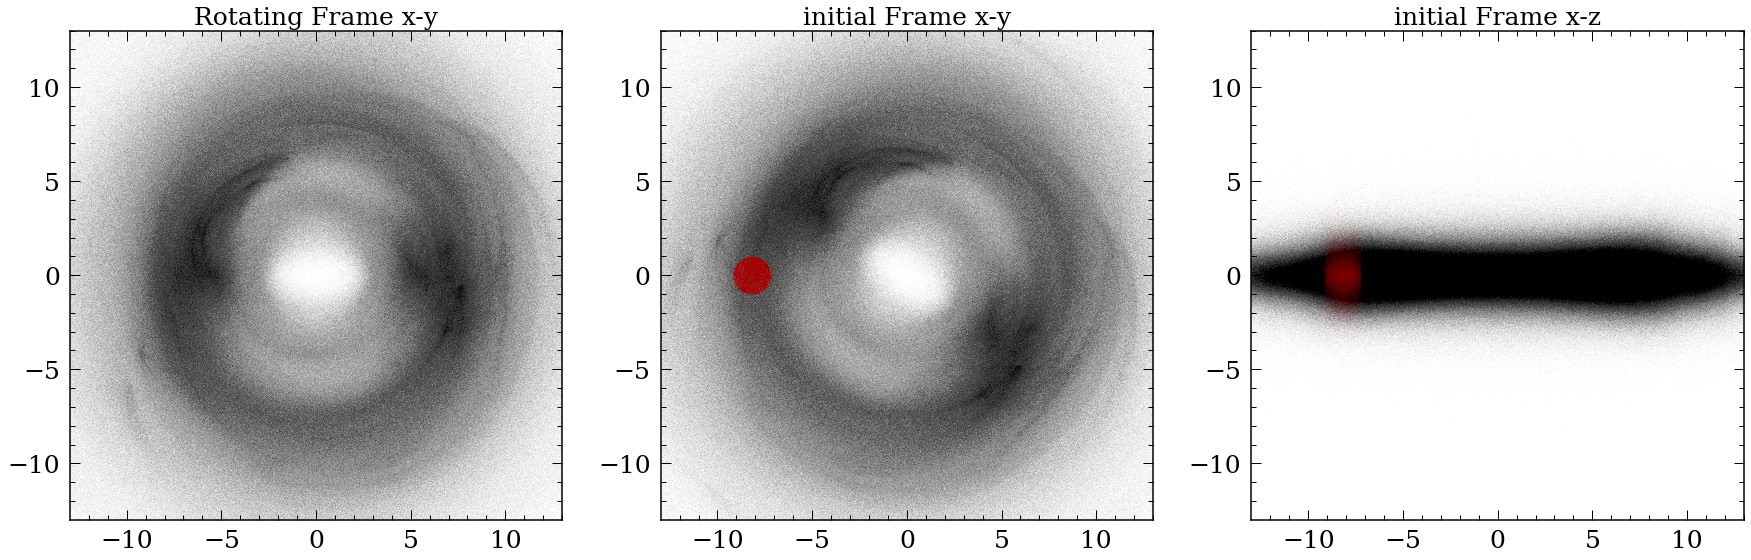

<Figure size 720x720 with 0 Axes>

In [17]:
bar_angle = -35.0 * numpy.pi/180  # orientation of the bar w.r.t. the Sun
sina, cosa = numpy.sin(bar_angle), numpy.cos(bar_angle)

xylim = 13

plt.figure(figsize=(30,9))
plt.subplot(1,3,1)
plt.plot(lastorbit[:,0], lastorbit[:,1], 'k.',markersize=0.01)
plt.xlim([-xylim,xylim])
plt.ylim([-xylim,xylim])
plt.title('Rotating Frame x-y', fontsize=25)

####################### back to initial frame #######################
orgx = np.copy(lastorbit[:,0])
orgy = np.copy(lastorbit[:,1])
lastorbit[:,0] = orgx * cosa - orgy * sina
lastorbit[:,1] = orgy * cosa + orgx * sina

# center at the sun
lastorbit[:,0] = lastorbit[:,0]

# get solar neighborhood
distsol = 1
m = (((lastorbit[:,0]+8.2)**2+lastorbit[:,1]**2)<distsol**2)
lastorbit_sr = lastorbit[m,:]
print(len(lastorbit_sr))

#####################################################################

plt.subplot(1,3,2)
plt.plot(lastorbit[:,0], lastorbit[:,1], 'k.',markersize=0.01)
plt.xlim([-xylim,xylim])
plt.ylim([-xylim,xylim])

plt.plot(lastorbit_sr[:,0], lastorbit_sr[:,1], 'r.',markersize=0.01)
plt.xlim([-xylim,xylim])
plt.ylim([-xylim,xylim])
plt.title('initial Frame x-y', fontsize=25)

plt.subplot(1,3,3)
plt.plot(lastorbit[:,0], lastorbit[:,2], 'k.',markersize=0.01)
plt.xlim([-xylim,xylim])
plt.ylim([-xylim,xylim])
plt.plot(lastorbit_sr[:,0], lastorbit_sr[:,2], 'r.',markersize=0.01)
plt.xlim([-xylim,xylim])
plt.ylim([-xylim,xylim])
plt.title('initial Frame x-z', fontsize=25)
plt.show()

plt.savefig('SolarNeighbor.png')

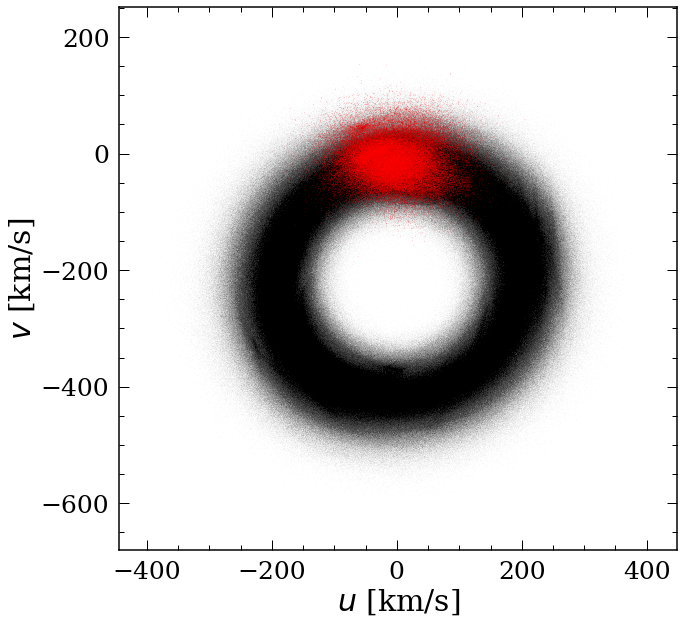

In [18]:
plt.figure()
u_sr = lastorbit_sr[:,3] * cosa - lastorbit_sr[:,4] * sina
v_sr = lastorbit_sr[:,4] * cosa + lastorbit_sr[:,3] * sina

u = lastorbit[:,3] * cosa - lastorbit[:,4] * sina
v = lastorbit[:,4] * cosa + lastorbit[:,3] * sina

plt.plot(u, v-220, 'k.', markersize=0.01)
plt.plot(u_sr, v_sr-220, 'r.', markersize=0.1)
plt.xlabel('$u$ [km/s]')
plt.ylabel('$v$ [km/s]')

plt.show()


In [19]:
import pandas as pd

df = pd.DataFrame(np.array((u, v-220)).T, columns=['u', 'v'])
df_sr = pd.DataFrame(np.array((u_sr, v_sr-220)).T, columns=['u', 'v'])



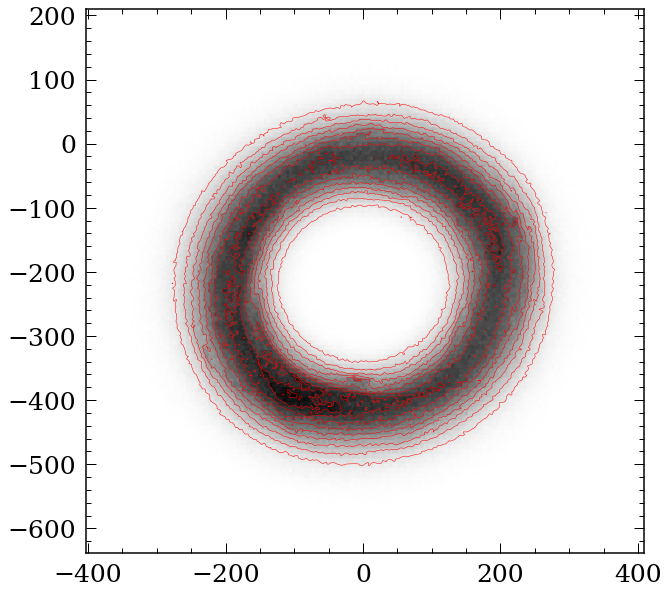

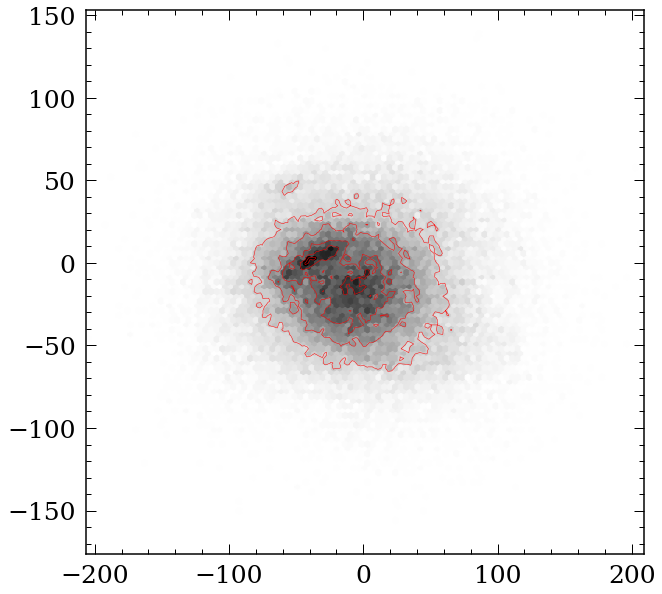

In [21]:

import matplotlib.tri as tri



plt.figure(figsize=(10,10))
h1 = plt.hexbin(df['u'], df['v'], gridsize=200, cmap='binary')
xy = h1.get_offsets()
v = h1.get_array()
plt.tricontour(xy[:,0],xy[:,1], v, 10, linewidths=0.5, colors='r')

plt.figure(figsize=(10,10))
h2 = plt.hexbin(df_sr['u'], df_sr['v'], gridsize=100, cmap='binary')
xy = h2.get_offsets()
v = h2.get_array()
plt.tricontour(xy[:,0],xy[:,1], v, 5, linewidths=0.5, colors='r')

plt.show()
